In [1]:
import category_encoders as ce
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import TransformedTargetRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from category_encoders import TargetEncoder
import seaborn as sns
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Lasso
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

from IPython.display import display
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile

from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit

In [2]:
data = pd.read_csv('train_house_B.csv')

In [3]:
data = data[[col for col in data.columns if col != 'price'] + ['price']]

In [128]:
data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,price
0,1.222962,0.047686,-1.033389,-2.465344,0.831065,0.802990,1.590989,0.727946,0.893957,-1.503143,...,-0.554035,-1.308863,-0.570187,-0.882735,-0.805741,-0.929397,0.232557,-0.679063,1.307431,2604000
1,-0.091662,-0.356325,-0.486840,-2.465344,-0.126718,-0.024866,-0.323972,1.658337,1.751428,-1.573310,...,-0.554035,0.047278,-0.570187,-0.897850,-0.805741,0.224410,0.864016,1.472618,-0.478408,4900000
2,1.222962,-1.064819,0.338749,0.405623,-0.854973,-0.654330,0.525426,0.585866,-1.661101,1.007304,...,-0.554035,-1.308863,-0.570187,-0.491114,0.355976,-0.929397,1.118967,1.472618,1.307431,4480000
3,1.222962,-1.570692,-0.696696,0.405623,-0.670784,-0.024866,0.557116,-1.280083,1.273040,-1.163932,...,-0.554035,1.403419,-0.570187,-0.724485,-0.805741,0.224410,0.924687,-0.679063,-0.478408,3234000
4,-1.406286,-1.563680,-1.058295,0.405623,-0.126718,-0.879174,-1.649281,0.496669,0.255596,0.928381,...,1.804941,0.047278,-0.570187,-0.306965,-0.805741,1.378217,0.170486,-0.679063,-0.478408,3780000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,-0.091662,0.593876,-0.087882,-2.465344,0.077307,0.151482,1.452151,1.772175,-1.264971,-1.352937,...,-0.554035,1.403419,-0.570187,0.454355,-0.805741,1.378217,1.200306,-0.679063,1.307431,3360000
404,-1.406286,0.179794,0.640850,0.405623,-0.126718,-0.975186,-1.028510,0.203867,-1.190658,0.955389,...,1.804941,0.047278,-0.570187,-1.037904,1.517692,-0.929397,0.960546,-0.679063,-0.478408,5950000
405,-0.091662,1.099966,0.225750,-2.465344,-0.716123,-0.534316,-0.090348,1.151380,1.631097,0.673274,...,-0.554035,-1.308863,-0.570187,0.477182,-0.805741,-0.929397,-1.512245,-0.679063,1.307431,3675000
406,1.222962,1.498909,-0.392289,0.405623,-0.126718,-0.024866,1.484438,-1.233671,-0.469048,-1.250468,...,-0.554035,0.047278,1.421812,0.407275,0.355976,0.224410,-1.477806,-0.679063,-0.478408,7455000


In [11]:
### Проведем первоначальное обучения для понимания результатов

In [523]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = 'price'), data['price'],
                                                   test_size=0.3)

In [491]:

pipeline_1 = Pipeline([
    ('model', TransformedTargetRegressor(
        regressor=Pipeline([
           # ("preproc", CT),
            ("regression", Ridge())
        ])
    ))
])

model_ridge = pipeline_1.fit(X_train[['0', '2', '4', '15']], y_train)

# Создайте объект StratifiedKFold с параметром shuffle=True
cv = KFold(n_splits=5, shuffle=True)

# Затем передайте этот объект в функцию cross_val_score
cv_scores = cross_val_score(model_ridge, X_test[['0', '2', '4', '15']], y_test, cv=cv, scoring="neg_mean_absolute_percentage_error")

print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean Precision = %.4f" % np.mean(-cv_scores))
#mean_absolute_error(y_test, model_ridge.predict(X_test))

Cross validation scores:
	 -0.1953
	-0.2235
	-0.2413
	-0.1875
	-0.2275
Mean Precision = 0.2150


In [7]:
model_2 = Lasso()


model_lasso= model_2.fit(X_train, y_train)

# Создайте объект StratifiedKFold с параметром shuffle=True
cv = KFold(n_splits=5, shuffle=True)

# Затем передайте этот объект в функцию cross_val_score
cv_scores = cross_val_score(model_ridge, X_test, y_test, cv=cv, scoring="neg_mean_absolute_percentage_error")

print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean Precision = %.4f" % np.mean(-cv_scores))
#mean_absolute_error(y_test, model_ridge.predict(X_test))

Cross validation scores:
	 -0.2136
	-0.1746
	-0.2372
	-0.2616
	-0.1555
Mean Precision = 0.2085


[-1.78911340e+05 -4.22467977e+04  3.24490352e+05  1.26984473e+05
 -1.86517785e+05  2.88310689e+04  1.88160216e+04 -5.91170199e+04
  9.69119420e+02  1.35045526e+04  0.00000000e+00 -1.27230774e+05
  3.62972590e+05  5.78641087e+04 -3.43117070e+04  2.77010084e+05
  1.34685761e+05  7.35566476e+04  1.11488644e+05 -5.87238036e+01
  3.07846916e+05  1.05247872e+05  3.60403969e+05 -2.51449699e+03
  2.60818513e+05  3.71220897e+05 -1.08425214e+05  3.74919943e+05
  3.83343839e+04]


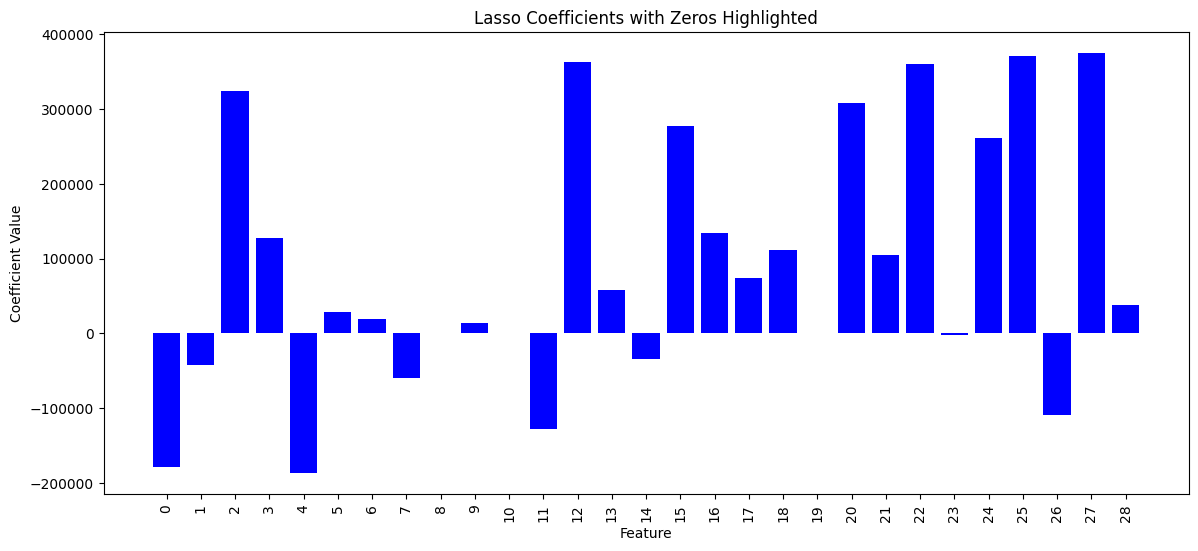

In [8]:
# Assuming model_lasso is your Lasso regression model
coefficients = model_lasso.coef_

# Get column names from your dataset
column_names = X_train.columns

# Create a bar plot of the coefficients
plt.figure(figsize=(14, 6))
plt.bar(column_names, coefficients, color='b')

# Highlight coefficients that are exactly zero
zero_coefficients = np.where(coefficients == 0)[0]
plt.bar(column_names[zero_coefficients], coefficients[zero_coefficients], color='r')
print(model_lasso.coef_)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients with Zeros Highlighted')
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better visibility
plt.show()

In [9]:
# data = load_breast_cancer()
# X, y = data.data, data.target

forest = RandomForestRegressor(n_estimators=500)
forest.fit(X_train, y_train)

# Создайте объект StratifiedKFold с параметром shuffle=True
cv = KFold(n_splits=5, shuffle=True)

# Затем передайте этот объект в функцию cross_val_score
cv_scores = cross_val_score(forest, X_test, y_test, cv=cv, scoring="neg_mean_absolute_percentage_error")

print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean Precision = %.4f" % np.mean(-cv_scores))


#(y_test, forest.predict(X_test))


Cross validation scores:
	 -0.1683
	-0.2473
	-0.2056
	-0.2206
	-0.2145
Mean Precision = 0.2112


In [29]:
pipeline_2 = Pipeline(
    steps=[
        ("regression", GradientBoostingRegressor())
    ]
)
model_gbm = pipeline_2.fit(X_train, y_train)

mean_absolute_percentage_error(y_test, model_gbm.predict(X_test))
# Затем передайте этот объект в функцию cross_val_score
# Затем передайте этот объект в функцию cross_val_score
cv_scores = cross_val_score(model_gbm, X_test, y_test, cv=cv, scoring="neg_mean_absolute_percentage_error")

print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean Precision = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -0.2318
	-0.1947
	-0.1788
	-0.2130
	-0.1719
Mean Precision = 0.1980


In [671]:
X = data.drop(columns = 'price').copy()
y = data['price']

In [189]:
# задаем определенное стартовое значение для воспроизводимости результата
noise = np.random.normal(0, .5, size=(len(data), 20))
# добавляем к данным шумовые признаки
# первые 15 признаков являются исходными, остальные 50 являются шумовыми
X_w_noise = np.hstack([X, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, y, test_size=.3)
# используем f_classif (по умолчанию)
# и SelectPercentile, чтобы выбрать 50% признаков
select_pct = SelectPercentile(percentile=50)
select_pct.fit(X_train, y_train)
# преобразовываем обучающий набор
X_train_selected = select_pct.transform(X_train)

D:\python\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
D:\python\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


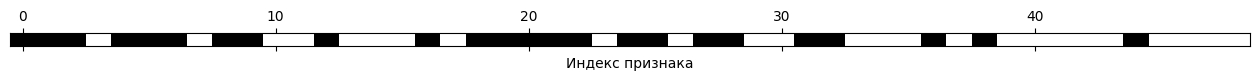

In [190]:
mask = select_pct.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака");

# mask = select_pct.get_support()[:17]
# plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.2)
# plt.yticks([])
# plt.xlabel("Индекс признака");


In [191]:
mask = select_pct.get_support()

# Вывести номера колонок, которые полезны
selected_columns = [i for i, selected in enumerate(mask) if selected]
norm_columns = [col for col in selected_columns if col <= 28]
#print("Выбранные колонки:", selected_columns)
print("Выбранные колонки:", norm_columns)

Выбранные колонки: [0, 1, 2, 4, 5, 6, 8, 9, 12, 16, 18, 19, 20, 21, 22, 24, 25, 27, 28]


In [52]:

pipeline_1 = Pipeline([
    ('model', TransformedTargetRegressor(
        regressor=Pipeline([
           # ("preproc", CT),
            ("regression", Ridge())
        ])
    ))
])

model_ridge = pipeline_1.fit(X_train, y_train)

# Создайте объект StratifiedKFold с параметром shuffle=True
cv = KFold(n_splits=5, shuffle=True)

# Затем передайте этот объект в функцию cross_val_score
cv_scores = cross_val_score(model_ridge, X_test, y_test, cv=cv, scoring="neg_mean_absolute_percentage_error")

print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean Precision = %.4f" % np.mean(-cv_scores))
#mean_absolute_error(y_test, model_ridge.predict(X_test))

Cross validation scores:
	 -0.1848
	-0.2342
	-0.2426
	-0.2341
	-0.2929
Mean Precision = 0.2377


In [57]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = 'price'), data['price'],
                                                   test_size=0.3)
pipeline_2 = Pipeline(
    steps=[
        ("regression", GradientBoostingRegressor())
    ]
)
model_gbm = pipeline_2.fit(X_train.iloc[:,norm_columns], y_train)



# Создайте объект StratifiedKFold с параметром shuffle=True
cv = KFold(n_splits=5, shuffle=True)

# Затем передайте этот объект в функцию cross_val_score
cv_scores = cross_val_score(model_gbm, X_test.iloc[:,norm_columns], y_test, cv=cv, scoring="neg_mean_absolute_percentage_error")

print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean Precision = %.4f" % np.mean(-cv_scores))
#mean_absolute_error(y_test, model_ridge.predict(X_test))

Cross validation scores:
	 -0.2515
	-0.1915
	-0.1888
	-0.2743
	-0.1614
Mean Precision = 0.2135


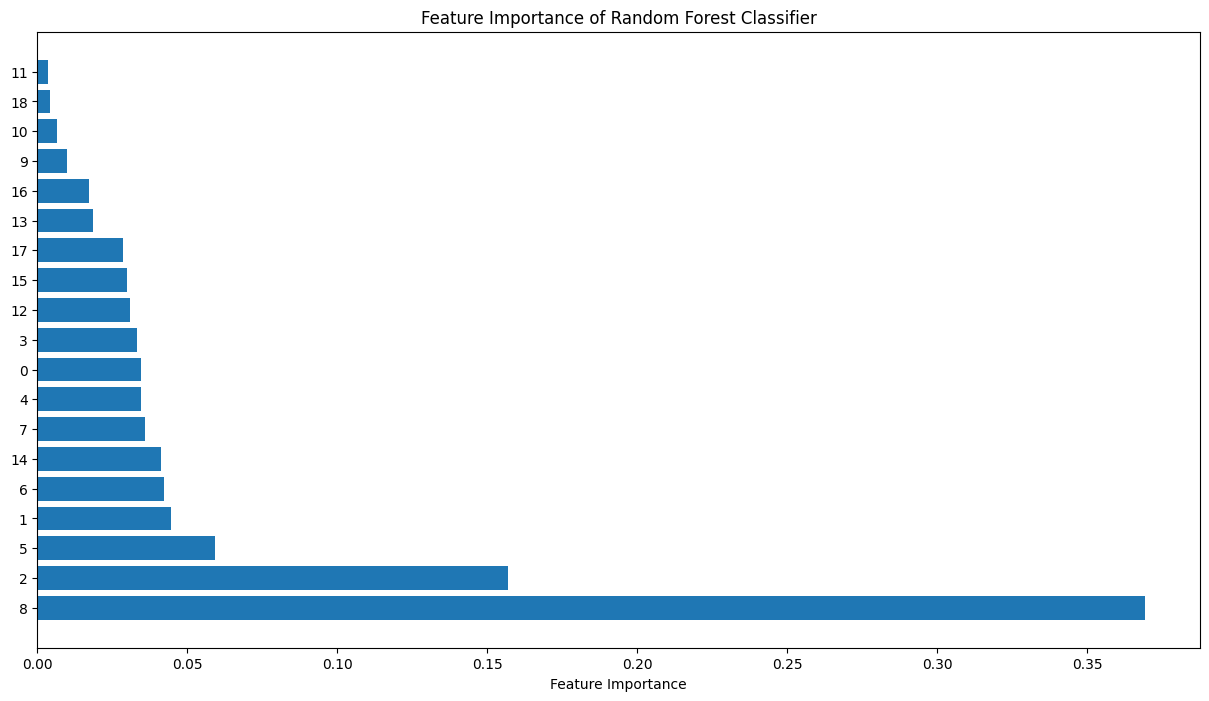

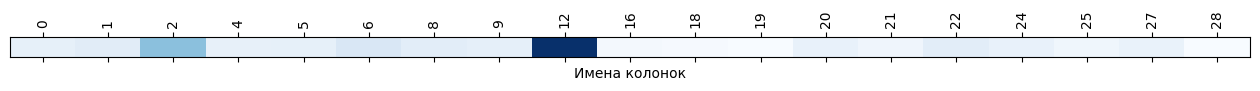

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3)

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
feature_names = np.array(data.drop(columns='price').columns)
importance = rfc.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importance)[::-1]
feature_names_sorted = feature_names[indices]
importance_sorted = importance[indices]

plt.barh(y=feature_names_sorted, width=importance_sorted)
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Random Forest Classifier')
plt.show()

mask = importance
plt.matshow(mask.reshape(1, -1), cmap='Blues', aspect=0.3)
plt.yticks([])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xticks(ticks=np.arange(len(X.columns)), labels=X.columns, rotation='vertical')
plt.xlabel("Имена колонок")
plt.show()

Оптимально : 23


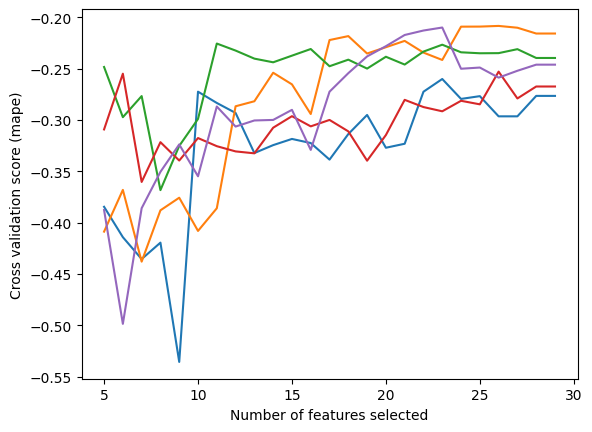

In [324]:

# Build a classification task using 5 informative features
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = 'price'), data.price, test_size=.5)
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.5)

# X, y = make_classification(
#     n_samples=1000,
#     n_features=25,
#     n_informative=10, # 5 информативных признаков, остальные линейная комбинация
#     n_redundant=2,
#     n_repeated=0,
#     n_classes=8,
#     n_clusters_per_class=1,
#     random_state=0,
# )

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications
rfc =  Ridge(alpha=20)

min_features_to_select = 5  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=KFold(5),
    scoring="neg_mean_absolute_percentage_error",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, y_train)

print("Оптимально : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (mape)")
filtered = pd.DataFrame(rfecv.cv_results_).filter(regex='split') #[s for s in rfecv.cv_results_.keys() if 'split' in s]
plt.plot(
    range(min_features_to_select, len(filtered) + min_features_to_select),
    filtered
)
plt.show()

D:\python\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\python\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


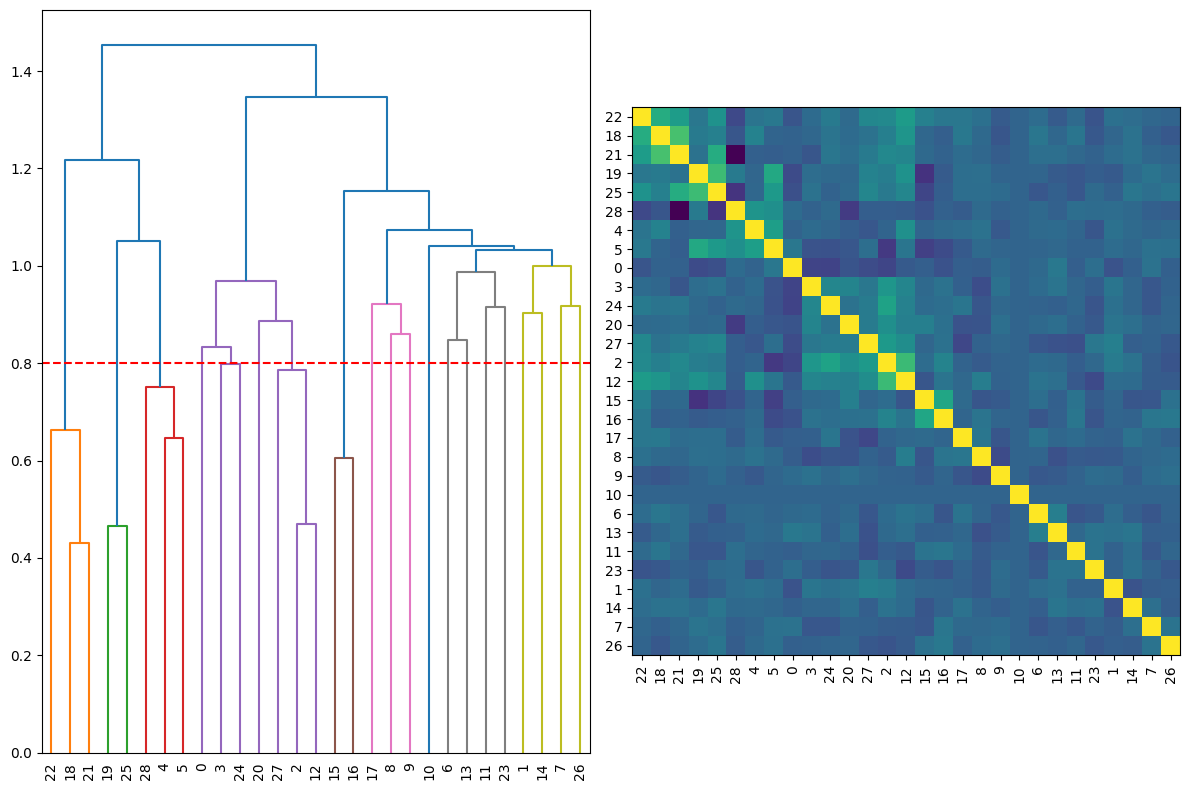

In [525]:
from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X_train).correlation
corr = np.nan_to_num(corr)
# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels = X_train.columns,
    ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax1.axhline(y=0.8, color='r', linestyle='--')


# distance_matrix = 1 - np.abs(corr)
# dist_linkage = hierarchy.ward(squareform(distance_matrix))
# dendro = hierarchy.dendrogram(
#     dist_linkage, 
#     ax=ax2, leaf_rotation=90
# )

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(X_train.columns[dendro["leaves"]], rotation="vertical")
ax2.set_yticklabels(X_train.columns[dendro["leaves"]])
fig.tight_layout()
plt.show()

Точность тестовых данных с удаленными признаками: 0.20
[0, 1, 4, 6, 7, 8, 10, 15, 18, 19]
Index(['0', '1', '4', '6', '7', '8', '10', '15', '18', '19'], dtype='object')


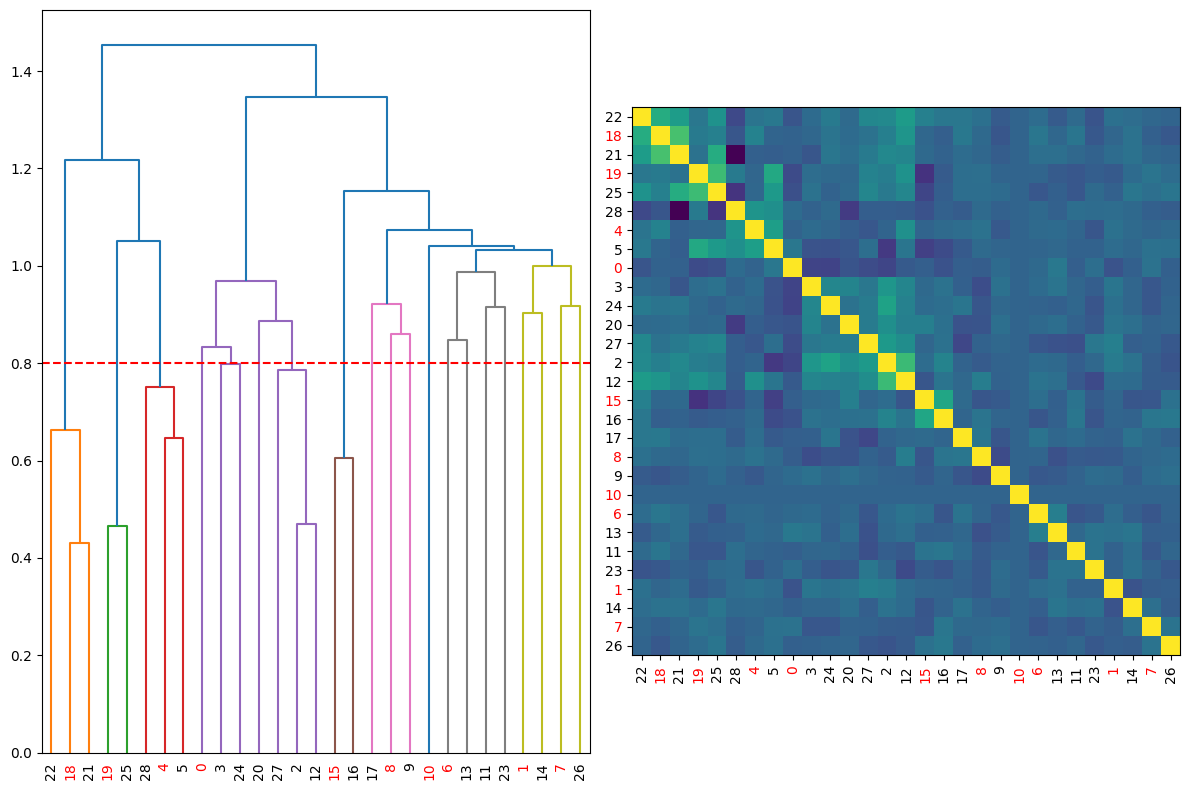

In [529]:
 from collections import defaultdict

cluster_ids = hierarchy.fcluster(dist_linkage,1.0, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

X_train_sel = X_train.iloc[:, selected_features]
X_test_sel = X_test.iloc[:, selected_features]

clf_sel = RandomForestRegressor(n_estimators=100)
clf_sel.fit(X_train_sel, y_train)
print(
    "Точность тестовых данных с удаленными признаками: {:.2f}".format(
        clf_sel.score(X_test_sel, y_test)
    )
)
y_pred_train = clf_sel.predict(X_train_sel)
y_pred = clf_sel.predict(X_test_sel)



selected_features_names = X_train.columns[selected_features]


print(selected_features)
print(selected_features_names)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels = X_train.columns,
    ax=ax1, leaf_rotation=90
)

ax1.axhline(y=0.8, color='r', linestyle='--')

[ax1.get_xticklabels()[dendro["leaves"].index(i)].set_color('red') for i  in selected_features];

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(X_train.columns[dendro["leaves"]], rotation="vertical")
ax2.set_yticklabels(X_train.columns[dendro["leaves"]])
fig.tight_layout()
[ax2.get_xticklabels()[dendro["leaves"].index(i)].set_color('red') for i  in selected_features];
[ax2.get_yticklabels()[dendro["leaves"].index(i)].set_color('red') for i  in selected_features];
plt.show()

### 1.2 Значимость признаков из модели

Попробуем посмотреть важность признаков, которые есть в нашей модели и кроме важности добавим разброс признаков. Идея в следующем, если разброс важности будет большой, то скорее всего признаки коррелируют, так как в разных деревьях, то они важны, то нет.  

форма обуч набора X: (285, 29)
форма обуч набора X median: (285, 15)


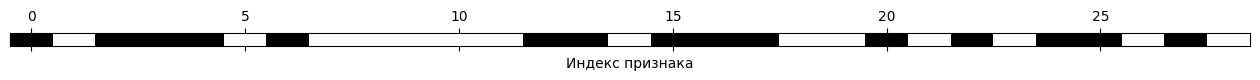

----------------------------------------------------
форма обуч набора X: (285, 29)
форма обуч набора X median: (285, 13)


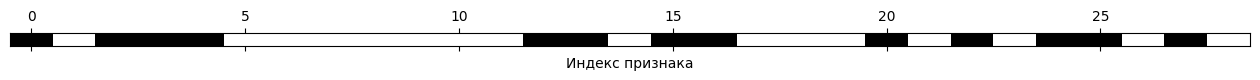

----------------------------------------------------
форма обуч набора X: (285, 29)
форма обуч набора X median: (285, 5)


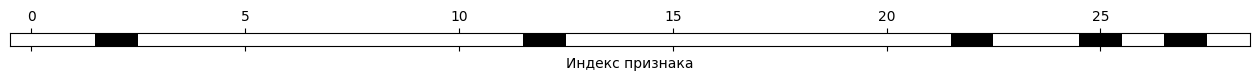

In [416]:
from sklearn.feature_selection import SelectFromModel
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='price'), data.price, test_size=0.3)


select = SelectFromModel(
     Ridge(alpha=20),
    threshold="median")

select.fit(X_train, y_train)
X_train_med = select.transform(X_train)
print("форма обуч набора X: {}".format(X_train.shape))
print("форма обуч набора X median: {}".format(X_train_med.shape))
mask_1 = select.get_support()
# визуализируем булевы значения -- черный – True, белый – False
plt.matshow( mask_1.reshape(1,-1), cmap = 'gray_r', aspect=0.3)
plt.yticks([])
plt.xlabel("Индекс признака");
plt.show();

print("----------------------------------------------------")

select = SelectFromModel(
     Ridge(alpha=20),
    threshold="0.7*mean")         # внимание на синтаксис
select.fit(X_train, y_train)
X_train_mean = select.transform(X_train)
print("форма обуч набора X: {}".format(X_train.shape))
print("форма обуч набора X median: {}".format(X_train_mean.shape))
mask_2 = select.get_support()
# визуализируем булевы значения -- черный – True, белый – False
plt.matshow( mask_2.reshape(1,-1), cmap = 'gray_r', aspect=0.3)
plt.yticks([])
plt.xlabel("Индекс признака");
plt.show();

print("----------------------------------------------------")

select = SelectFromModel(
     Ridge(alpha=20),
    threshold = -np.inf,     # внимание на синтаксис
    max_features = 
    5)         # внимание на синтаксис
select.fit(X_train, y_train)
X_train_mean = select.transform(X_train)
print("форма обуч набора X: {}".format(X_train.shape))
print("форма обуч набора X median: {}".format(X_train_mean.shape))
mask_3 = select.get_support()
# визуализируем булевы значения -- черный – True, белый – False
plt.matshow( mask_3.reshape(1,-1), cmap = 'gray_r', aspect=0.3)
plt.yticks([])
plt.xlabel("Индекс признака");
plt.show();

In [417]:
selected_columns = [i for i, selected in enumerate(mask_2) if selected]
print("Выбранные колонки:", selected_columns)

Выбранные колонки: [0, 2, 3, 4, 12, 13, 15, 16, 20, 22, 24, 25, 27]


In [484]:
pipeline_1 = Pipeline([
    ('model', TransformedTargetRegressor(
        regressor=Pipeline([
            ("preproc", StandardScaler()),
            ("regression", Ridge())
        ])
    ))
])

model_ridge = pipeline_1.fit(X_train.iloc[:,selected_columns], y_train)

# Создайте объект StratifiedKFold с параметром shuffle=True
cv = KFold(n_splits=5, shuffle=True)

# Затем передайте этот объект в функцию cross_val_score
cv_scores = cross_val_score(model_ridge, X_test.iloc[:,selected_columns], y_test, cv=cv, scoring="neg_mean_absolute_percentage_error")

print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean MAPE = %.4f" % np.mean(-cv_scores))
#mean_absolute_error(y_test, model_ridge.predict(X_test))

IndexError: positional indexers are out-of-bounds

In [334]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = 'price'), data['price'],
                                                   test_size=0.3)
pipeline_2 = Pipeline(
    steps=[
        ("regression", GradientBoostingRegressor())
    ]
)
model_gbm = pipeline_2.fit(X_train.iloc[:,selected_columns], y_train)



# Создайте объект StratifiedKFold с параметром shuffle=True
cv = KFold(n_splits=5, shuffle=True)

# Затем передайте этот объект в функцию cross_val_score
cv_scores = cross_val_score(model_gbm, X_test.iloc[:,selected_columns], y_test, cv=cv, scoring="neg_mean_absolute_percentage_error")

print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean Precision = %.4f" % np.mean(-cv_scores))
#mean_absolute_error(y_test, model_ridge.predict(X_test))

Cross validation scores:
	 -0.2027
	-0.2209
	-0.2571
	-0.2272
	-0.1647
Mean Precision = 0.2145


# Подбор гиперпараметров

In [396]:
# selected_columns_best = selected_columns

In [694]:
selected_columns

[0, 2, 3, 4, 12, 13, 15, 16, 20, 22, 24, 25, 27]

In [693]:
X = data.iloc[:,selected_columns]
# X = data[['0', '1', '4', '6', '7', '8', '10', '15', '18', '19']]

In [670]:
X.isna().sum()

0     0
2     0
3     0
4     0
12    0
13    0
15    0
16    0
20    0
22    0
24    0
25    0
27    0
dtype: int64

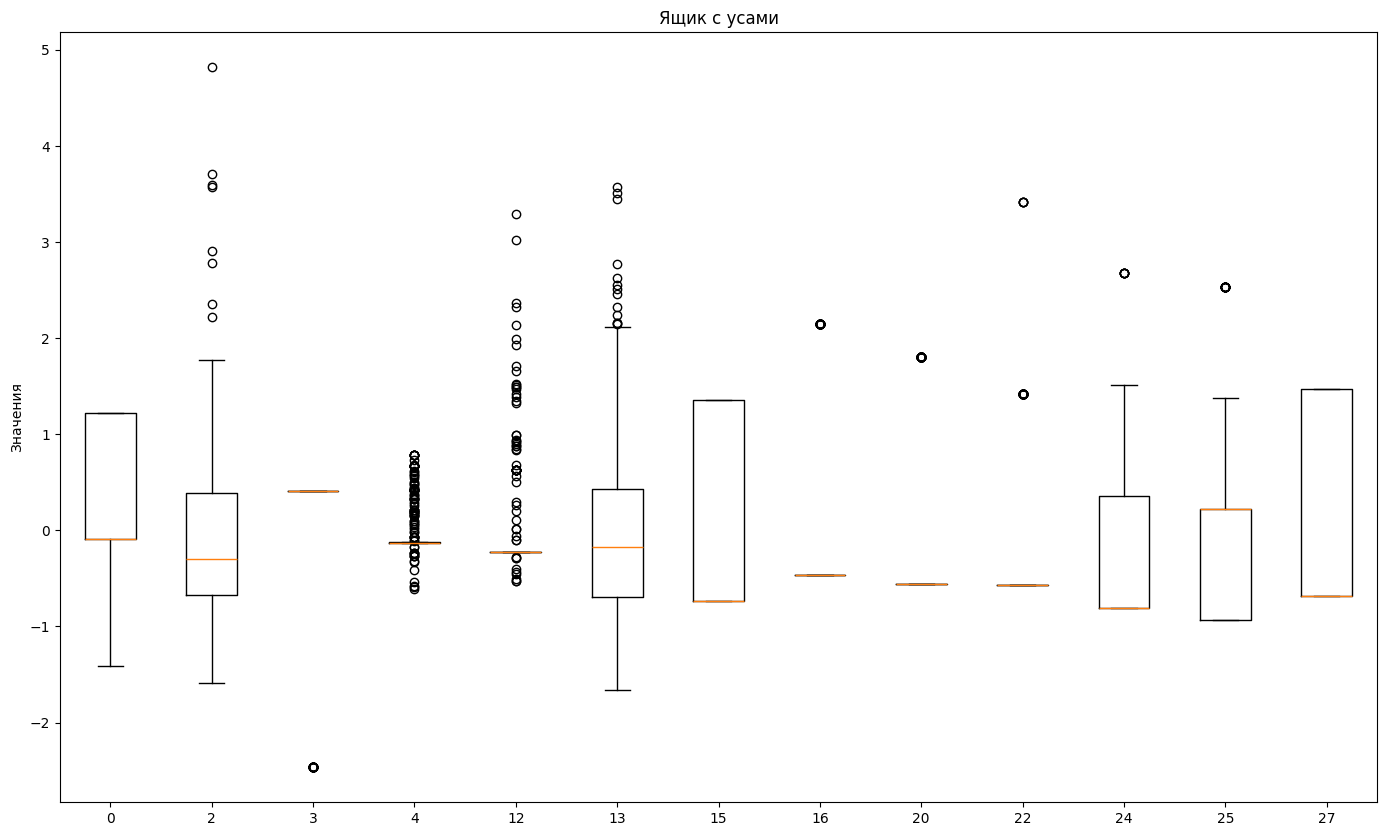

In [592]:
import matplotlib.pyplot as plt

# Set the figure size first
plt.figure(figsize=(17, 10))

# Create a boxplot for the columns in the DataFrame 'train'
plt.boxplot(X.values, labels = X.columns)

# Add a title and axis labels
plt.title('Ящик с усами')
plt.ylabel('Значения')

# Show the plot
plt.show()


In [682]:
X = pd.concat([X,y], axis = 1)

In [683]:
X = X[X['4'] >= X['4'].quantile(0.02)]
X = X[X['4'] <= X['4'].quantile(0.98)]
X = X[X['12'] >= X['12'].quantile(0.02)]
X = X[X['12'] <= X['12'].quantile(0.98)]

In [684]:
y = X.price
X = X.drop(columns = 'price')

In [692]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


model_2 = Ridge(alpha=23)

model_ridge = model_2.fit(X_train, y_train)
#ridge_predictions = model_ridge.predict(X_test)

# Создайте объект StratifiedKFold с параметром shuffle=True
cv = KFold(n_splits=5, shuffle=True)

# Затем передайте этот объект в функцию cross_val_score
cv_scores = cross_val_score(model_ridge, X_test, y_test, cv=cv, scoring="neg_mean_absolute_percentage_error")

print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean MAPE = %.4f" % np.mean(-cv_scores))
#mean_absolute_error(y_test, model_ridge.predict(X_test))

Cross validation scores:
	 -0.1535
	-0.2084
	-0.1927
	-0.2404
	-0.1779
Mean MAPE = 0.1946


In [677]:
cc = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


    model_2 = Ridge(alpha=20)
    
    model_ridge = model_2.fit(X_train, y_train)
    #ridge_predictions = model_ridge.predict(X_test)
    
    # Создайте объект StratifiedKFold с параметром shuffle=True
    cv = KFold(n_splits=5, shuffle=True)
    
    # Затем передайте этот объект в функцию cross_val_score
    cv_scores = cross_val_score(model_ridge, X_test, y_test, cv=cv, scoring="neg_mean_absolute_percentage_error")
    cc += [-cv_scores]

In [678]:
np.mean(cc)

0.18075596893233456

In [617]:
pipeline = Pipeline([
    ('lasso', Ridge())
])

param_grid = {
    'lasso__alpha': np.arange(0,100,1) 
}

scores='neg_mean_absolute_percentage_error'
grid = GridSearchCV(pipeline, n_jobs=-1, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error')
grid.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('lasso', Ridge())]), n_jobs=-1,
             param_grid={'lasso__alpha': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='neg_mean_absolute_percentage_error')

In [618]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score'])
grid_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lasso__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.004286,0.000257,0.002724,0.000400,22,{'lasso__alpha': 22},-0.175118,-0.174050,-0.158304,-0.167889,-0.212399,-0.177552,0.018419,1
23,0.004635,0.000359,0.002847,0.000433,23,{'lasso__alpha': 23},-0.175071,-0.174070,-0.158501,-0.167705,-0.212430,-0.177555,0.018410,2
21,0.004146,0.001106,0.002508,0.000900,21,{'lasso__alpha': 21},-0.175165,-0.174031,-0.158106,-0.168076,-0.212408,-0.177557,0.018444,3
24,0.004209,0.000384,0.002745,0.000520,24,{'lasso__alpha': 24},-0.175025,-0.174089,-0.158697,-0.167523,-0.212477,-0.177562,0.018407,4
25,0.004380,0.000321,0.003108,0.000469,25,{'lasso__alpha': 25},-0.174978,-0.174109,-0.158892,-0.167343,-0.212524,-0.177569,0.018406,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003774,0.000471,0.001599,0.000489,95,{'lasso__alpha': 95},-0.172257,-0.177094,-0.174946,-0.162607,-0.225062,-0.182393,0.021902,96
96,0.004185,0.000490,0.002663,0.000417,96,{'lasso__alpha': 96},-0.172234,-0.177215,-0.175149,-0.162604,-0.225265,-0.182493,0.021964,97
97,0.004369,0.000355,0.002320,0.000418,97,{'lasso__alpha': 97},-0.172211,-0.177335,-0.175351,-0.162601,-0.225467,-0.182593,0.022026,98
98,0.003525,0.000444,0.002166,0.000341,98,{'lasso__alpha': 98},-0.172188,-0.177455,-0.175552,-0.162598,-0.225669,-0.182692,0.022089,99


In [371]:
pipeline_2 = Pipeline(
    steps=[
        ("regression", GradientBoostingRegressor(n_estimators=49, learning_rate=0.1))
    ]
)
model_gbm = pipeline_2.fit(X_train, y_train)

mean_absolute_percentage_error(y_test, model_gbm.predict(X_test))
# Затем передайте этот объект в функцию cross_val_score
# Затем передайте этот объект в функцию cross_val_score4
cv_scores = cross_val_score(model_gbm, X_test, y_test, cv=cv, scoring="neg_mean_absolute_percentage_error")

print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean Precision = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -0.1821
	-0.1944
	-0.2575
	-0.2311
	-0.1966
Mean Precision = 0.2123


In [368]:
from sklearn.metrics import make_scorer, f1_score
# Use StratifiedKFold for cross-validation to handle class imbalances

# Define the parameter grid for the grid search
param_grid = {
    'regression__n_estimators': np.arange(10,50,1),
    'regression__learning_rate': [1, 0.5, 0.3, 0.2, 0.1,10],
}


# Perform grid search
grid_search = GridSearchCV(pipeline_2, param_grid=param_grid, cv=cv, scoring= 'neg_mean_absolute_percentage_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best model from the grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [369]:
grid_result = pd.DataFrame(grid_search.cv_results_).sort_values(["rank_test_score",'std_test_score'])
grid_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regression__learning_rate,param_regression__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
199,0.047730,0.002213,0.001400,0.000488,0.1,49,"{'regression__learning_rate': 0.1, 'regression...",-1.861357e-01,-1.999908e-01,-2.019356e-01,-1.695202e-01,-2.064962e-01,-1.928157e-01,1.348417e-02,1
190,0.047030,0.009907,0.001401,0.000806,0.1,40,"{'regression__learning_rate': 0.1, 'regression...",-1.901096e-01,-1.994466e-01,-2.018754e-01,-1.672863e-01,-2.081667e-01,-1.933769e-01,1.427724e-02,2
192,0.041847,0.003402,0.001513,0.000449,0.1,42,"{'regression__learning_rate': 0.1, 'regression...",-1.893452e-01,-2.011598e-01,-2.006026e-01,-1.679272e-01,-2.081330e-01,-1.934336e-01,1.410285e-02,3
198,0.045660,0.002399,0.001001,0.000015,0.1,48,"{'regression__learning_rate': 0.1, 'regression...",-1.869418e-01,-2.005395e-01,-2.017234e-01,-1.711322e-01,-2.071472e-01,-1.934968e-01,1.301348e-02,4
131,0.021205,0.000751,0.001503,0.000446,0.2,21,"{'regression__learning_rate': 0.2, 'regression...",-1.846182e-01,-2.088921e-01,-1.983202e-01,-1.648199e-01,-2.115182e-01,-1.936337e-01,1.724040e-02,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.046028,0.003495,0.001400,0.000494,10,45,"{'regression__learning_rate': 10, 'regression_...",-1.986455e+42,-2.080564e+42,-1.423459e+42,-1.965569e+42,-1.950796e+42,-1.881369e+42,2.333722e+41,236
236,0.047259,0.001843,0.001188,0.000397,10,46,"{'regression__learning_rate': 10, 'regression_...",-1.787809e+43,-1.872508e+43,-1.281113e+43,-1.769676e+43,-1.755744e+43,-1.693370e+43,2.100847e+42,237
237,0.057582,0.015304,0.001797,0.000753,10,47,"{'regression__learning_rate': 10, 'regression_...",-1.609028e+44,-1.685257e+44,-1.153002e+44,-1.592644e+44,-1.580145e+44,-1.524015e+44,1.890701e+43,238
238,0.047035,0.003503,0.001405,0.000489,10,48,"{'regression__learning_rate': 10, 'regression_...",-1.448126e+45,-1.516731e+45,-1.037702e+45,-1.432906e+45,-1.420523e+45,-1.371198e+45,1.700344e+44,239
